In [92]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.pipeline import Pipeline
from keras import models
model = models.Sequential()

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [93]:
#loading images and their labels
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels for the images (0 = no IDC, 1 = IDC)

In [94]:
#making sure the data for X crossed over correctly
print(X[:3])

[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [95]:
#making sure the data for Y crosssed over correctly
print(Y[:5])

[0 0 0 0 0]


In [96]:
#total number of images 
print('Total number of images: {}'.format(len(X)))

Total number of images: 5547


In [97]:
#total number of negative IDC images
print('Number of negative IDC Images: {}'.format(np.sum(Y==0)))

Number of negative IDC Images: 2759


In [98]:
#total number of positive IDC images
print('Number of positive IDC Images: {}'.format(np.sum(Y==1)))

Number of positive IDC Images: 2788


In [99]:
#shape of the images
print('Image shape (Width, Height, Channels): {}'.format(X[0].shape))

Image shape (Width, Height, Channels): (50, 50, 3)


In [100]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [101]:
# Reduce Sample Size
x_train = x_train[0:30000] 
y_train = y_train[0:30000]
x_test = x_test[0:30000] 
y_test = y_test[0:30000]

In [102]:
# rescale pizel intensity
x_train = x_train / 256.0
x_test = x_test / 256.0

In [103]:
#verifying shape
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (4437, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3)


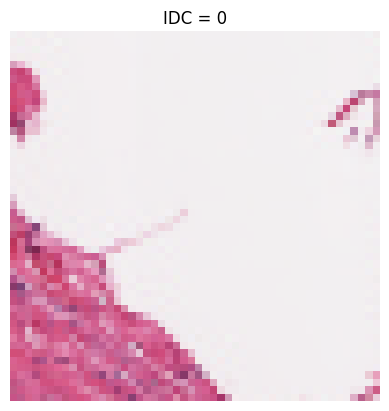

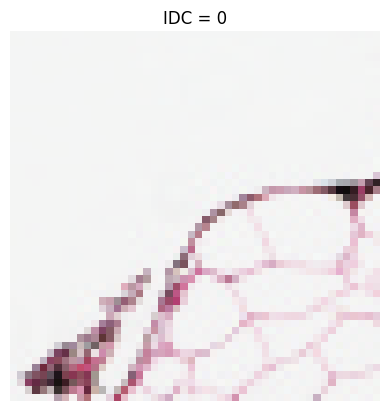

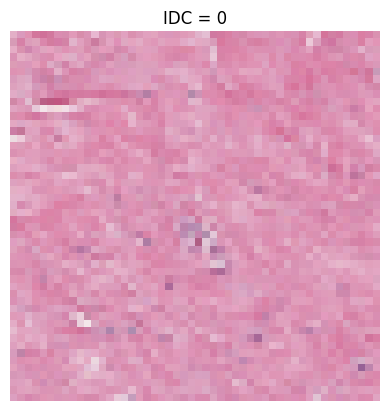

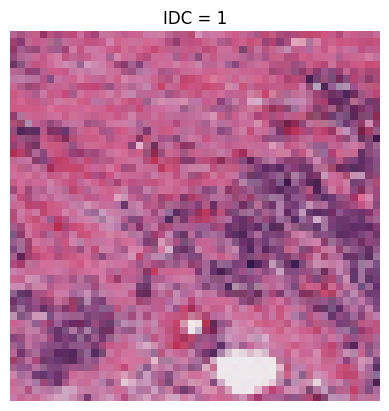

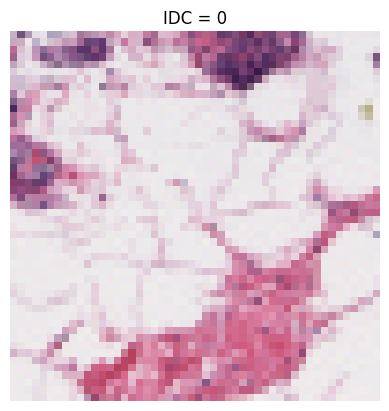

In [104]:
#displaying the first five images in the training set along with the labels
for i in range(5):
    plt.imshow(x_train[i], cmap='gray'), plt.axis("off")
    plt.title('IDC = %d'%y_train[i])
    plt.show()

In [105]:
#printing the data to show that it's now 0-1
print(x_train[:3])

[[[[0.9453125  0.94140625 0.94921875]
   [0.953125   0.92578125 0.94140625]
   [0.953125   0.94140625 0.9375    ]
   ...
   [0.94921875 0.9375     0.9453125 ]
   [0.9453125  0.94921875 0.953125  ]
   [0.94921875 0.9296875  0.93359375]]

  [[0.95703125 0.92578125 0.93359375]
   [0.9375     0.94140625 0.93359375]
   [0.95703125 0.92578125 0.94140625]
   ...
   [0.94921875 0.9375     0.9453125 ]
   [0.9609375  0.93359375 0.9453125 ]
   [0.9453125  0.953125   0.94140625]]

  [[0.94921875 0.9375     0.9453125 ]
   [0.953125   0.9296875  0.95703125]
   [0.94921875 0.93359375 0.94140625]
   ...
   [0.94921875 0.94140625 0.9453125 ]
   [0.94140625 0.9453125  0.94921875]
   [0.953125   0.9296875  0.9453125 ]]

  ...

  [[0.7578125  0.328125   0.51171875]
   [0.77734375 0.3828125  0.5625    ]
   [0.83984375 0.43359375 0.60546875]
   ...
   [0.9453125  0.9296875  0.94140625]
   [0.94140625 0.9296875  0.9375    ]
   [0.93359375 0.78515625 0.84375   ]]

  [[0.75       0.359375   0.52734375]
   [0.8

In [106]:
# reshape data

x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

print("x_train shape: ",x_train_r.shape)
print("x_test shape: ",x_test_r.shape)

x_train shape:  (4437, 7500)
x_test shape:  (1110, 7500)


In [107]:
def buildclassifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_r.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [108]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train_r, y = y_train, cv = 6)
mean = accuracies.mean()
variance = accuracies.std()

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 3s 6ms/step - loss: 0.6900 - accuracy: 0.5069
Epoch 2/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6752 - accuracy: 0.5721
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6440 - accuracy: 0.6492
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6163 - accuracy: 0.6760
Epoch 5/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5891 - accuracy: 0.7046
Epoch 6/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.7111
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5639 - accuracy: 0.7187
Epoch 8/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5405 - accuracy: 0.7392
Epoch 9/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5387 - accuracy: 0.7395
Epoch 10/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5321 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4593 - accuracy: 0.7944
Epoch 82/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4453 - accuracy: 0.8039
Epoch 83/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4552 - accuracy: 0.7985
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4560 - accuracy: 0.7971
Epoch 85/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4398 - accuracy: 0.8093
Epoch 86/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4627 - accuracy: 0.7996
Epoch 87/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4484 - accuracy: 0.8082
Epoch 88/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4366 - accuracy: 0.8144
Epoch 89/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4469 - accuracy: 0.8050
Epoch 90/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4560 - accuracy: 

116/116 [==============================] - 1s 7ms/step - loss: 0.3923 - accuracy: 0.8364
Epoch 161/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3711 - accuracy: 0.8537
Epoch 162/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3678 - accuracy: 0.8529
Epoch 163/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3776 - accuracy: 0.8461
Epoch 164/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3630 - accuracy: 0.8556
Epoch 165/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4193 - accuracy: 0.8223
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3759 - accuracy: 0.8493
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3907 - accuracy: 0.8407
Epoch 168/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3709 - accuracy: 0.8493
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3885 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 3s 6ms/step - loss: 0.6905 - accuracy: 0.5009
Epoch 2/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6835 - accuracy: 0.5510
Epoch 3/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6590 - accuracy: 0.6083
Epoch 4/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6353 - accuracy: 0.6646
Epoch 5/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6184 - accuracy: 0.6800
Epoch 6/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6094 - accuracy: 0.6946
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5880 - accuracy: 0.7100
Epoch 8/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5855 - accuracy: 0.7114
Epoch 9/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5721 - accuracy: 0.7092
Epoch 10/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5662 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4796 - accuracy: 0.7860
Epoch 82/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4615 - accuracy: 0.7969
Epoch 83/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4473 - accuracy: 0.8020
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4745 - accuracy: 0.7869
Epoch 85/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4587 - accuracy: 0.7998
Epoch 86/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4514 - accuracy: 0.8015
Epoch 87/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4566 - accuracy: 0.8034
Epoch 88/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4596 - accuracy: 0.7988
Epoch 89/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4482 - accuracy: 0.8131
Epoch 90/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4519 - accuracy: 

116/116 [==============================] - 1s 6ms/step - loss: 0.4153 - accuracy: 0.8301
Epoch 161/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3977 - accuracy: 0.8355
Epoch 162/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3963 - accuracy: 0.8350
Epoch 163/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3810 - accuracy: 0.8453
Epoch 164/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3765 - accuracy: 0.8431
Epoch 165/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3786 - accuracy: 0.8431
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3856 - accuracy: 0.8420
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3928 - accuracy: 0.8355
Epoch 168/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3885 - accuracy: 0.8423
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3941 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 3s 6ms/step - loss: 0.6920 - accuracy: 0.5031
Epoch 2/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6879 - accuracy: 0.5356
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6735 - accuracy: 0.5661
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6474 - accuracy: 0.6424
Epoch 5/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6257 - accuracy: 0.6811
Epoch 6/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6095 - accuracy: 0.6922
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5955 - accuracy: 0.7081
Epoch 8/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5828 - accuracy: 0.7084
Epoch 9/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5779 - accuracy: 0.7149
Epoch 10/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5656 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.7850
Epoch 82/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4623 - accuracy: 0.8031
Epoch 83/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4535 - accuracy: 0.8044
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4611 - accuracy: 0.8006
Epoch 85/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4512 - accuracy: 0.8058
Epoch 86/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4562 - accuracy: 0.7990
Epoch 87/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4636 - accuracy: 0.8004
Epoch 88/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4490 - accuracy: 0.8082
Epoch 89/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4574 - accuracy: 0.8006
Epoch 90/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4658 - accuracy: 

116/116 [==============================] - 1s 6ms/step - loss: 0.4254 - accuracy: 0.8209
Epoch 161/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3955 - accuracy: 0.8350
Epoch 162/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3886 - accuracy: 0.8442
Epoch 163/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3842 - accuracy: 0.8496
Epoch 164/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3922 - accuracy: 0.8401
Epoch 165/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3908 - accuracy: 0.8377
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3979 - accuracy: 0.8372
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3784 - accuracy: 0.8480
Epoch 168/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3828 - accuracy: 0.8439
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3962 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 3s 7ms/step - loss: 0.6907 - accuracy: 0.5011
Epoch 2/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6828 - accuracy: 0.5333
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6513 - accuracy: 0.6228
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6160 - accuracy: 0.6620
Epoch 5/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5939 - accuracy: 0.6925
Epoch 6/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5853 - accuracy: 0.7012
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5658 - accuracy: 0.7169
Epoch 8/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5585 - accuracy: 0.7180
Epoch 9/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5685 - accuracy: 0.7120
Epoch 10/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5475 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4549 - accuracy: 0.7937
Epoch 82/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4579 - accuracy: 0.7926
Epoch 83/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4909 - accuracy: 0.7650
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4715 - accuracy: 0.7847
Epoch 85/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4615 - accuracy: 0.7902
Epoch 86/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4483 - accuracy: 0.8012
Epoch 87/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4495 - accuracy: 0.7988
Epoch 88/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4539 - accuracy: 0.7934
Epoch 89/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4506 - accuracy: 0.8053
Epoch 90/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4464 - accuracy: 

116/116 [==============================] - 1s 6ms/step - loss: 0.3916 - accuracy: 0.8340
Epoch 161/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4029 - accuracy: 0.8307
Epoch 162/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3833 - accuracy: 0.8396
Epoch 163/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3950 - accuracy: 0.8296
Epoch 164/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3858 - accuracy: 0.8383
Epoch 165/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3749 - accuracy: 0.8434
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4023 - accuracy: 0.8288
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3826 - accuracy: 0.8372
Epoch 168/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3897 - accuracy: 0.8350
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4059 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 3s 7ms/step - loss: 0.6897 - accuracy: 0.5035
Epoch 2/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6817 - accuracy: 0.5452
Epoch 3/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6572 - accuracy: 0.6244
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6272 - accuracy: 0.6668
Epoch 5/200
116/116 [==============================] - 1s 8ms/step - loss: 0.6124 - accuracy: 0.6796
Epoch 6/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5948 - accuracy: 0.6942
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5830 - accuracy: 0.7071
Epoch 8/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5709 - accuracy: 0.7090
Epoch 9/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5748 - accuracy: 0.7158
Epoch 10/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5636 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4693 - accuracy: 0.7907
Epoch 82/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4784 - accuracy: 0.7842
Epoch 83/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4616 - accuracy: 0.7942
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4688 - accuracy: 0.7942
Epoch 85/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4688 - accuracy: 0.7885
Epoch 86/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4546 - accuracy: 0.7964
Epoch 87/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4560 - accuracy: 0.7988
Epoch 88/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4611 - accuracy: 0.7934
Epoch 89/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4677 - accuracy: 0.7896
Epoch 90/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4734 - accuracy: 

116/116 [==============================] - 1s 6ms/step - loss: 0.3875 - accuracy: 0.8445
Epoch 161/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4146 - accuracy: 0.8264
Epoch 162/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4066 - accuracy: 0.8340
Epoch 163/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4109 - accuracy: 0.8218
Epoch 164/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4036 - accuracy: 0.8361
Epoch 165/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3991 - accuracy: 0.8364
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4014 - accuracy: 0.8307
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3974 - accuracy: 0.8369
Epoch 168/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3825 - accuracy: 0.8451
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3828 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 2s 7ms/step - loss: 0.6904 - accuracy: 0.5016
Epoch 2/200
116/116 [==============================] - 1s 7ms/step - loss: 0.6847 - accuracy: 0.5284
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6602 - accuracy: 0.6217
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6116 - accuracy: 0.6847
Epoch 5/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5940 - accuracy: 0.6969
Epoch 6/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5855 - accuracy: 0.7017
Epoch 7/200
116/116 [==============================] - 1s 6ms/step - loss: 0.5654 - accuracy: 0.7198
Epoch 8/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5598 - accuracy: 0.7209
Epoch 9/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5493 - accuracy: 0.7363
Epoch 10/200
116/116 [==============================] - 1s 7ms/step - loss: 0.5439 - accura

116/116 [==============================] - 1s 6ms/step - loss: 0.4724 - accuracy: 0.7864
Epoch 82/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4554 - accuracy: 0.7953
Epoch 83/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4600 - accuracy: 0.7953
Epoch 84/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4808 - accuracy: 0.7880
Epoch 85/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4583 - accuracy: 0.7966
Epoch 86/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4479 - accuracy: 0.8029
Epoch 87/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4578 - accuracy: 0.7996
Epoch 88/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4577 - accuracy: 0.8002
Epoch 89/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4522 - accuracy: 0.8067
Epoch 90/200
116/116 [==============================] - 1s 7ms/step - loss: 0.4578 - accuracy: 

116/116 [==============================] - 1s 6ms/step - loss: 0.3913 - accuracy: 0.8367
Epoch 161/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3937 - accuracy: 0.8372
Epoch 162/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4268 - accuracy: 0.8196
Epoch 163/200
116/116 [==============================] - 1s 7ms/step - loss: 0.3876 - accuracy: 0.8418
Epoch 164/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4028 - accuracy: 0.8350
Epoch 165/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3930 - accuracy: 0.8410
Epoch 166/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3827 - accuracy: 0.8461
Epoch 167/200
116/116 [==============================] - 1s 6ms/step - loss: 0.3981 - accuracy: 0.8313
Epoch 168/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4062 - accuracy: 0.8348
Epoch 169/200
116/116 [==============================] - 1s 6ms/step - loss: 0.4234 - a

In [109]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.7189570152019407
Accuracy variance: 0.027899708347895104


In [110]:
#classifiying decision tree and fitting it
dtc = DecisionTreeClassifier()
dtc_y = dtc.fit(x_train_r,y_train)

In [111]:
dtc_pred = dtc_y.predict(x_test_r)
print('Accuracy Score : ' + str(accuracy_score(y_test,dtc_pred)))
print('Precision Score : ' + str(precision_score(y_test,dtc_pred)))
print('Recall Score : ' + str(recall_score(y_test,dtc_pred)))
print('F1 Score : ' + str(f1_score(y_test,dtc_pred)))

Accuracy Score : 0.6855855855855856
Precision Score : 0.7064220183486238
Recall Score : 0.6707317073170732
F1 Score : 0.6881143878462913


In [112]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,dtc_pred)))

Confusion Matrix : 
[[376 160]
 [189 385]]


In [113]:
#classifying random forest tree and fitting it
rfc= RandomForestClassifier(n_estimators = 100, random_state=42)
rfc_y = rfc.fit(x_train_r,y_train) 

In [114]:
rfc_pred = rfc_y.predict(x_test_r)
print('Accuracy Score : ' + str(accuracy_score(y_test,rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test,rfc_pred)))
print('Recall Score : ' + str(recall_score(y_test,rfc_pred)))
print('F1 Score : ' + str(f1_score(y_test,rfc_pred)))

Accuracy Score : 0.7747747747747747
Precision Score : 0.7852112676056338
Recall Score : 0.7770034843205574
F1 Score : 0.7810858143607706


In [115]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,rfc_pred)))

Confusion Matrix : 
[[414 122]
 [128 446]]


In [116]:
#SVC classiying and fitting
svc = SVC(random_state=42)
svc_y = svc.fit(x_train_r,y_train)

In [117]:
svc_pred = svc_y.predict(x_test_r)
print('Accuracy Score : ' + str(accuracy_score(y_test,svc_pred)))
print('Precision Score : ' + str(precision_score(y_test,svc_pred)))
print('Recall Score : ' + str(recall_score(y_test,svc_pred)))
print('F1 Score : ' + str(f1_score(y_test,svc_pred)))

Accuracy Score : 0.7864864864864864
Precision Score : 0.8025134649910234
Recall Score : 0.7787456445993032
F1 Score : 0.790450928381963


In [118]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,svc_pred)))

Confusion Matrix : 
[[426 110]
 [127 447]]


In [119]:
#logistic regression classifying and fittnig
lr = LogisticRegression()
lr_y = lr.fit(x_train_r,y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
lr_pred = lr_y.predict(x_test_r)
print('Accuracy Score : ' + str(accuracy_score(y_test,lr_pred)))
print('Precision Score : ' + str(precision_score(y_test,lr_pred)))
print('Recall Score : ' + str(recall_score(y_test,lr_pred)))
print('F1 Score : ' + str(f1_score(y_test,lr_pred)))

Accuracy Score : 0.7018018018018019
Precision Score : 0.7237569060773481
Recall Score : 0.6846689895470384
F1 Score : 0.7036705461056401


In [121]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))

Confusion Matrix : 
[[386 150]
 [181 393]]


In [122]:
#logistic regression classifying and fittnig
knn = KNeighborsClassifier()
knn_y = knn.fit(x_train_r,y_train)

In [123]:
#logisitic regression accuracy
kscore = knn.score(x_test_r,y_test)
print("KNeighbors accuracy", kscore)

KNeighbors accuracy 0.7117117117117117


In [124]:
knn_pred = knn_y.predict(x_test_r)
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_pred)))
print('Precision Score : ' + str(precision_score(y_test,knn_pred)))
print('Recall Score : ' + str(recall_score(y_test,knn_pred)))
print('F1 Score : ' + str(f1_score(y_test,knn_pred)))

Accuracy Score : 0.7117117117117117
Precision Score : 0.7702127659574468
Recall Score : 0.6306620209059234
F1 Score : 0.6934865900383141


In [125]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))

Confusion Matrix : 
[[386 150]
 [181 393]]


In [126]:
results = []
results.append(mean)
results.append(dscore)
results.append(rscore)
results.append(sscore)
results.append(lscore)
results.append(kscore)
print(results)

[0.7189570152019407, 0.6891891891891891, 0.7738738738738739, 0.7801801801801802, 0.69009009009009, 0.7117117117117117]


In [127]:
models = []
models.append(('classifier', KerasClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('ls', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
print(models)

[('classifier', KerasClassifier(
	model=None
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)), ('dtc', DecisionTreeClassifier()), ('rfc', RandomForestClassifier()), ('svc', SVC()), ('ls', LogisticRegression()), ('knn', KNeighborsClassifier())]


The below code is something I was working on; the gridsearch. But, couldn't get it to work for this project. 

minmax = MinMaxScaler()

dtc = DecisionTreeClassifier()
rfc= RandomForestClassifier(n_estimators = 100, random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression()
knn = KNeighborsClassifier()
dtr = DecisionTreeRegressor()

pipe = Pipeline(steps = [('scaler', minmax), ('classifier', dtr)])

pipe.fit(x_train_r, y_train)

param_grid = [{'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15]}, 
              {'classifier':[dtc], 
               'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_leaf_nodes': [None,10,20,50,100]}, 
              {'classifier':[rfc], 
              'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_features': [2,3,4,5,6]}, 
              {'classifier':[svc], 
              'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_features': [2,3,4,5,6]}, 
               {'classifier':[lr], 
              'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_features': [2,3,4,5,6]}, 
               {'classifier':[knn], 
              'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_features': [2,3,4,5,6]}, 
              {'classifier':[dtr], 
              'classifier__max_depth': [2,6,8,10], 
              'classifier__min_samples_split': [2,5,10,15], 
              'classifier__max_features': [2,3,4,5,6]},
             ]

grid_search = GridSearchCV(pipe, param_grid, cv = 5, verbose = 0)

best_model = grid_search.fit(x_train_r, y_train)